Tasks from https://www.kaggle.com/datasets/ksabishek/product-sales-data?resource=download

1) Is there any trend in the sales of all four products during certain months?
2) Out of all four products , which product has seen the highest sales in all the given years?
3) The company has all it's retail centers closed on the 31st of December every year. Mr: Hariharan , the CEO , would love to get an estimate on no: of units of each product that could be sold on 31st of Dec , every year , if all their retail centers were kept open.
4) The CEO is considering an idea to drop the production of any one of the products. He wants you to analyze this data and suggest whether his idea would result in a massive setback for the company.
5) The CEO would also like to predict the sales and revenues for the year 2024. He wants you to give a yearly estimate with the best possible accuracy.
Can you help REC corp with your analytical and data science skills ?

## Task 1. Is there any trend in the sales of all four products during certain months?

Answer: Yes, there is a huge dip in February with spikes in July and January.

In [2]:
import pandas as pd
import plotly.express as px

df = pd.read_csv("./statsfinal.csv")

df['QTotal'] = df["Q-P1"] + df["Q-P2"] + df["Q-P3"] + df["Q-P4"]
df['dt'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')
df['month-year'] = df['dt'].dt.strftime('%Y-%m')
df['month'] = df['dt'].dt.month
df['year'] = df['dt'].dt.year



dx = df.groupby('month-year')["QTotal"].sum()
dy = df.groupby('month')["QTotal"].sum()

dy.head()


month
1.0    4275211
2.0    3561548
3.0    3865316
4.0    3844183
5.0    3954981
Name: QTotal, dtype: int64

In [3]:

fig = px.line(dy, title='Total sales trend')
fig.show()

## Task 2. Out of all four products , which product has seen the highest sales in all the given years?
Answer: product 1

In [4]:

p1 = df["Q-P1"].sum()
p2 = df["Q-P2"].sum()
p3 = df["Q-P3"].sum()
p4 = df["Q-P4"].sum()

dz = pd.DataFrame({"Sales": [p1, p2, p3, p4]}, index=["P1", "P2", "P3", "P4"])

dz.head()

fig = px.bar(dz, title='Total sales by product')
fig.show()


3) The company has all it's retail centers closed on the 31st of December every year. Mr: Hariharan , the CEO , would love to get an estimate on no: of units of each product that could be sold on 31st of Dec , every year , if all their retail centers were kept open.

The easiest way to calculate expected sells on Dec31 is to find an average between sells on Dec30 and Jan1 of each year.

There is no test data for Dec 31st, so I see no application of ML there.

Answer: see graph.

In [5]:
subset1 = df[df["Date"].str.startswith("30-12-")][["year","QTotal"]]
subset1.reset_index(inplace=True)

subset1.head()


,index,year,QTotal
0,200,2010.0,17071
1,564,2011.0,12544
2,927,2012.0,9921
3,1291,2013.0,16598
4,1655,2014.0,6459


In [6]:
subset2 = df[df["Date"].str.startswith("01-01-")][["year","QTotal"]]
subset2.reset_index(inplace=True)

subset2["year"] = subset2["year"] - 1

subset2.head()

,index,year,QTotal
0,201,2010.0,9960
1,565,2011.0,13502
2,928,2012.0,9395
3,1292,2013.0,11172
4,1656,2014.0,8289


In [7]:

subset3 = subset1.merge(subset2, on="year", validate="1:1")
subset3["ExpectedSells"] = (subset3["QTotal_x"] + subset3["QTotal_y"] ) / 2

subset3.head()


,index_x,year,QTotal_x,index_y,QTotal_y,ExpectedSells
0,200,2010.0,17071,201,9960,13515.5
1,564,2011.0,12544,565,13502,13023.0
2,927,2012.0,9921,928,9395,9658.0
3,1291,2013.0,16598,1292,11172,13885.0
4,1655,2014.0,6459,1656,8289,7374.0


In [8]:
fig = px.bar(subset3, title='Expected sales on Dec31', x="year", y="ExpectedSells")
fig.show()

## Task 4. The CEO is considering an idea to drop the production of any one of the products. He wants you to analyze this data and suggest whether his idea would result in a massive setback for the company.

As seen on the graph, product 4 responds to the smallest amount of sales each year from 2010 to 2022. Out of all 4 products, I would recommend dropping the production of it. The setback would be about 15% of the total revenue.

In [21]:
df["STotal"] = df["S-P1"] + df["S-P2"] +df["S-P3"] + df["S-P4"]
dt = df.groupby("year").sum()

dt["S-P1"] = 100 * dt["S-P1"] / dt["STotal"]
dt["S-P2"] = 100 * dt["S-P2"] / dt["STotal"]
dt["S-P3"] = 100 * dt["S-P3"] / dt["STotal"]
dt["S-P4"] = 100 * dt["S-P4"] / dt["STotal"]

dt.head()

,Unnamed: 0,Q-P1,Q-P2,Q-P3,Q-P4,S-P1,S-P2,S-P3,S-P4,QTotal,month,STotal
year,,,,,,,,,,,,
2010.0,19821,802353,429038,624624,219849,24.895490,26.624469,33.137053,15.342988,2075864,1825.0,10216545.38
2011.0,138223,1433066,747815,1150383,409762,24.634817,25.710310,33.811593,15.843280,3741026,2352.0,18440645.24
2012.0,269065,1505099,766875,1139098,415878,25.416016,25.899834,32.888459,15.795691,3826950,2350.0,18772272.63
2013.0,401397,1524821,752582,1110297,402313,26.140231,25.803248,32.543911,15.512610,3790013,2352.0,18491353.88
2014.0,533165,1562941,785457,1155979,401840,25.987742,26.120313,32.863661,15.028284,3906217,2352.0,19064845.73


In [20]:

fig = px.bar(dt, y=["S-P1", "S-P2","S-P3", "S-P4"])

fig.show()

## Task 5. The CEO would also like to predict the sales and revenues for the year 2024. He wants you to give a yearly estimate with the best possible accuracy.

I've used SARIMA model to predict a result of 18763189

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.



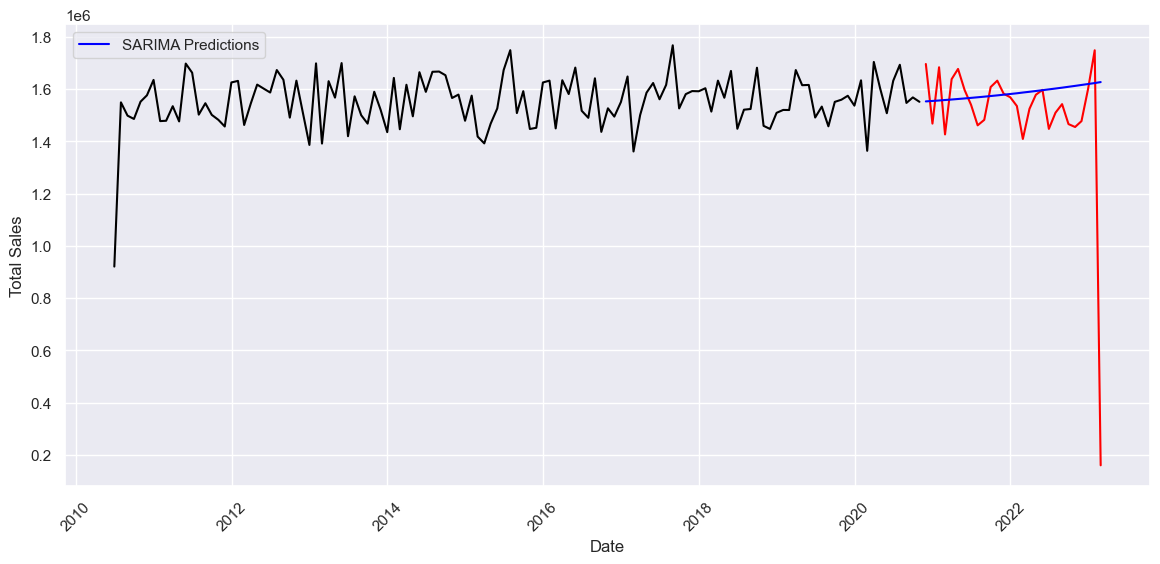

In [86]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

df.reset_index(inplace=True)
df = df.set_index("dt")
dq = df.groupby(pd.Grouper(freq="M")).sum()
dq.head()

train = dq[dq.index < pd.to_datetime("2020-11-01", format='%Y-%m-%d')]
test = dq[dq.index > pd.to_datetime("2020-11-01", format='%Y-%m-%d')]

plt.figure(figsize=(14,6))
plt.plot(train["STotal"], color = "black")
plt.plot(test["STotal"], color = "red")
plt.ylabel('Total Sales')
plt.xlabel('Date')
plt.xticks(rotation=45)

y=train["STotal"]

SARIMAXmodel = SARIMAX(y, order = (1, 0,0),trend="t")
SARIMAXmodel = SARIMAXmodel.fit()

y_pred = SARIMAXmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = SARIMAXmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 
plt.plot(y_pred_out, color='Blue', label = 'SARIMA Predictions')
plt.legend()

In [93]:
dg = df.groupby("year").sum()
fig = px.bar(dg, y="STotal")

fig.show()

In [98]:
y_pred = SARIMAXmodel.get_forecast(12)
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = SARIMAXmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_out = y_pred_df["Predictions"] 

res = y_pred_out.sum()
print(res)

print(df.max())

18763189.46353563
level_0            4599
index              4599
Unnamed: 0         4599
Date          31-9-2022
Q-P1               7998
Q-P2               3998
Q-P3               6000
Q-P4               2000
S-P1           25353.66
S-P2           25347.32
S-P3            32520.0
S-P4            14260.0
QTotal            19108
month              12.0
year             2023.0
STotal         93819.41
dtype: object


C:\Users\pauln\AppData\Local\Temp\ipykernel_9876\1344831636.py:9: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

